In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
def plot_mesh(xm, ym):
    for y in ym:
        plt.plot([xm[0],xm[-1]], [y,y], color = 'gray', ls = '-', lw = 0.5)
    for x in xm:
        plt.plot([x,x], [ym[0],ym[-1]], color = 'gray', ls = '-', lw = 0.5)

In [3]:
#
# 0       1       2       3       4       5   
# |                                       |   Nx  = 4 (nodos interiores)
# *---*---|---*---|---*---|---*---|---*---*   Nvx = 5 (volúmenes)
# |                                       |
# 0   1       2       3       4       5   6   hx = L / Nx + 1 = L / Nvx 
#
#  <----------------- L ------------------>  
#
Nx = 11
Ny = 11
Nvx = Nx + 1
Nvy = Ny + 1
Lx = 1.0
Ly = 1.0
hx = Lx / (Nx+1)
hy = Ly / (Ny+1)
print(hx, hy)

0.08333333333333333 0.08333333333333333


[[-0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  -0.00000000e+00 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00]
 [-2.58819045e-01 -2.50000000e-01 -2.24143868e-01 -1.83012702e-01
  -1.29409523e-01 -6.69872981e-02 -1.58480958e-17  6.69872981e-02
   1.29409523e-01  1.83012702e-01  2.24143868e-01  2.50000000e-01
   2.58819045e-01]
 [-5.00000000e-01 -4.82962913e-01 -4.33012702e-01 -3.53553391e-01
  -2.50000000e-01 -1.29409523e-01 -3.06161700e-17  1.29409523e-01
   2.50000000e-01  3.53553391e-01  4.33012702e-01  4.82962913e-01
   5.00000000e-01]
 [-7.07106781e-01 -6.83012702e-01 -6.12372436e-01 -5.00000000e-01
  -3.53553391e-01 -1.83012702e-01 -4.32978028e-17  1.83012702e-01
   3.53553391e-01  5.00000000e-01  6.12372436e-01  6.83012702e-01
   7.07106781e-01]
 [-8.66025404e-01 -8.36516304e-01 -7.50000000e-01 -6.12372436e-01
  -4.33012702e-01 -2.24143868e-01 -5.30287619e-17  2.24143868e-01


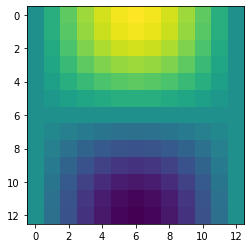

In [4]:
NxT = Nx + 2
NyT = Ny + 2

# Coordenadas de la malla
xn = np.linspace(0,Lx,NxT)
yn = np.linspace(0,Ly,NyT)

#print(NxT, NyT)
#print(xn)
#print(yn)

xg, yg = np.meshgrid(xn, yn, indexing='ij', sparse=False)

#print(xg)
#print(yg)

# Definición del campo escalar
T = np.zeros((NxT, NyT))
for i in range(NxT):
    for j in range(NyT):
        T[i,j] = i / NxT

# Valores en las fronteras del dominio
TL = 1.5; TR = 2.5
TB = 3.5; TT = 4.5
T[0 , :] = TL # LEFT
T[-1, :] = TR # RIGHT
T[: , 0] = TB # BOTTOM
T[: ,-1] = TT # TOP

# Dos puntos especiales en el dominio
T[NxT//3, NyT//3] = TT
T[2*NxT//3, 2*NyT//3] = TT

# Definición del campo vectorial (en este caso dos valores por nodo)
v = np.zeros((2, NxT, NyT))
A = 1.0
alpha_x = 1.0
alpha_y = 1.0
v[0] = -A * np.cos(np.pi * alpha_y * yg / Ly) * np.sin(np.pi * alpha_x * xg / Lx)
v[1] =  A * np.sin(np.pi * alpha_y * yg / Ly) * np.cos(np.pi * alpha_x * xg / Lx)

print(v[0])
print(v[1])

plt.imshow(v[1])

x shape:  (13, 13) y shape:  (13, 13) T shape:  (13, 13) v shape : (2, 13, 13)


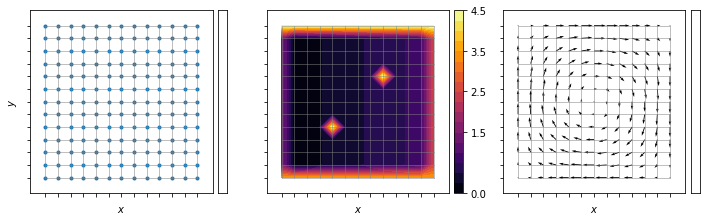

In [5]:
NxT = Nx + 2
NyT = Ny + 2

# Coordenadas de la malla
xn = np.linspace(0,Lx,NxT)
yn = np.linspace(0,Ly,NyT)
xg, yg = np.meshgrid(xn, yn, indexing='ij', sparse=False)

# Definición del campo escalar
T = np.zeros((NxT, NyT))
for i in range(NxT):
    for j in range(NyT):
        T[i,j] = i / NxT

# Valores en las fronteras del dominio
TL = 1.5; TR = 2.5
TB = 3.5; TT = 4.5
T[0 , :] = TL # LEFT
T[-1, :] = TR # RIGHT
T[: , 0] = TB # BOTTOM
T[: ,-1] = TT # TOP

# Dos puntos especiales en el dominio
T[NxT//3, NyT//3] = TT
T[2*NxT//3, 2*NyT//3] = TT

# Definición del campo vectorial (en este caso dos valores por nodo)
v = np.zeros((2, NxT, NyT))
A = 1.0
alpha_x = 1.0
alpha_y = 1.0
v[0] = -A * np.cos(np.pi * alpha_y * yg / Ly) * np.sin(np.pi * alpha_x * xg / Lx)
v[1] =  A * np.sin(np.pi * alpha_y * yg / Ly) * np.cos(np.pi * alpha_x * xg / Lx)

print('x shape: ', xg.shape, 'y shape: ', yg.shape, 
      'T shape: ', T.shape, 'v shape :', v.shape)

fig = plt.figure(figsize=(12,5))

plt.subplot(1,3,1)
plt.scatter(xg, yg, marker='.')
plt.xticks(xn, labels=[])
plt.yticks(yn, labels=[])
plt.xlabel('$x$')
plt.ylabel('$y$')
lmax = max(Lx,Ly)
offx = lmax * 0.1
offy = lmax * 0.1
plt.xlim(-offx, Lx+offx)
plt.ylim(-offy, Ly+offy)
plot_mesh(xn, yn)
ax = plt.gca()
ax.set_aspect('equal')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", "5%", pad="3%")
cax.set_xticks([])
cax.set_yticks([])

plt.subplot(1,3,2)
c = plt.contourf(xg, yg, T, levels=20, cmap='inferno')
plt.xticks(xn, labels=[])
plt.yticks(yn, labels=[])
plt.xlabel('$x$')
#plt.ylabel('$y$')
lmax = max(Lx,Ly)
offx = lmax * 0.1
offy = lmax * 0.1
plt.xlim(-offx, Lx+offx)
plt.ylim(-offy, Ly+offy)
plot_mesh(xn, yn)
ax = plt.gca()
ax.set_aspect('equal')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", "5%", pad="3%")
cax.set_xticks([])
cax.set_yticks([])
fig.colorbar(c, cax=cax, ticks=[0, TL, TR, TB, TT], orientation='vertical')

plt.subplot(1,3,3)
plt.quiver(xg, yg, v[0], v[1])
plt.xticks(xn, labels=[])
plt.yticks(yn, labels=[])
plt.xlabel('$x$')
#plt.ylabel('$y$')
plt.xlim(-offx, Lx+offx)
plt.ylim(-offy, Ly+offy)
plot_mesh(xn, yn)
ax = plt.gca()
ax.set_aspect('equal')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", "5%", pad="3%")
cax.set_xticks([])
cax.set_yticks([])

plt.savefig('nodes.pdf')
plt.show()

x shape:  (14, 14) y shape:  (14, 14) T shape:  (14, 14) v shape : (2, 14, 14)


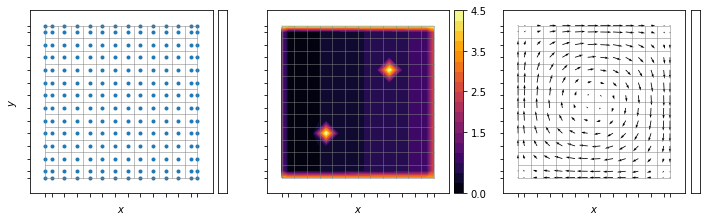

In [6]:
NvxT = Nvx + 2
NvyT = Nvy + 2

# Coordenadas de la malla
xv = np.zeros(NvxT)
yv = np.zeros(NvyT)
xv[-1] = Lx
yv[-1] = Ly
xv[1:-1] = np.linspace(0.5*hx,Lx-0.5*hx,Nvx)
yv[1:-1] = np.linspace(0.5*hy,Ly-0.5*hy,Nvy)

# Coordenadas de la malla
xvg, yvg = np.meshgrid(xv, yv, indexing='ij', sparse=False)

# Definición del campo escalar
Tv = np.zeros((NvxT, NvyT))
for i in range(NvxT):
    for j in range(NvyT):
        Tv[i,j] = i / NvxT

# Valores en las fronteras del dominio
TL = 1.5; TR = 2.5
TB = 3.5; TT = 4.5
Tv[0 , :] = TL # LEFT
Tv[-1, :] = TR # RIGHT
Tv[: , 0] = TB # BOTTOM
Tv[: ,-1] = TT # TOP

# Dos puntos especiales en el dominio
Tv[NvxT//3, NvyT//3] = TT
Tv[2*NvxT//3, 2*NvyT//3] = TT

# Definición del campo vectorial (en este caso dos valores por nodo)
vv = np.zeros((2, NvxT, NvyT))
A = 1.0
alpha_x = 1.0
alpha_y = 1.0
vv[0] = -A * np.cos(np.pi * alpha_y * yvg / Ly) * np.sin(np.pi * alpha_x * xvg / Lx)
vv[1] =  A * np.sin(np.pi * alpha_y * yvg / Ly) * np.cos(np.pi * alpha_x * xvg / Lx)

print('x shape: ', xvg.shape, 'y shape: ', yvg.shape, 
      'T shape: ', Tv.shape, 'v shape :', vv.shape)

fig = plt.figure(figsize=(12,5))

plt.subplot(1,3,1)
plt.scatter(xvg, yvg, marker='.')
plt.xticks(xv, labels=[])
plt.yticks(yv, labels=[])
plt.xlabel('$x$')
plt.ylabel('$y$')
lmax = max(Lx,Ly)
offx = lmax * 0.1
offy = lmax * 0.1
plt.xlim(-offx, Lx+offx)
plt.ylim(-offy, Ly+offy)
plot_mesh(xn, yn)
ax = plt.gca()
ax.set_aspect('equal')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", "5%", pad="3%")
cax.set_xticks([])
cax.set_yticks([])

plt.subplot(1,3,2)
c = plt.contourf(xvg, yvg, Tv, levels=20, cmap='inferno')
plt.xticks(xv, labels=[])
plt.yticks(yv, labels=[])
plt.xlabel('$x$')
#plt.ylabel('$y$')
lmax = max(Lx,Ly)
offx = lmax * 0.1
offy = lmax * 0.1
plt.xlim(-offx, Lx+offx)
plt.ylim(-offy, Ly+offy)
plot_mesh(xn, yn)
ax = plt.gca()
ax.set_aspect('equal')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", "5%", pad="3%")
cax.set_xticks([])
cax.set_yticks([])
fig.colorbar(c, cax=cax, ticks=[0, TL, TR, TB, TT], orientation='vertical')

plt.subplot(1,3,3)
plt.quiver(xvg, yvg, vv[0], vv[1])
plt.xticks(xv, labels=[])
plt.yticks(yv, labels=[])
plt.xlabel('$x$')
#plt.ylabel('$y$')
plt.xlim(-offx, Lx+offx)
plt.ylim(-offy, Ly+offy)
plot_mesh(xn, yn)
ax = plt.gca()
ax.set_aspect('equal')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", "5%", pad="3%")
cax.set_xticks([])
cax.set_yticks([])

plt.savefig('volumes.pdf')
plt.show()

In [7]:
# Coordenadas de la malla recorrida
xf_sx, yf_sx = np.meshgrid(xn, yv, indexing='ij', sparse=False)
xf_sy, yf_sy = np.meshgrid(xv, yn, indexing='ij', sparse=False)

x shape:  (13, 14) y shape:  (13, 14) x shape:  (14, 13) y shape:  (14, 13) vx shape:  (2, 13, 14) vy shape:  (2, 14, 13)


[]

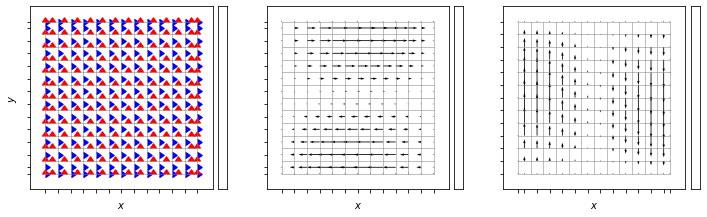

In [8]:
# Definición del campo vectorial (en este caso dos valores por nodo)
vx = np.zeros((2, NxT, NvyT))
vy = np.zeros((2, NvxT, NyT))

A = 1.0
alpha_x = 1.0
alpha_y = 1.0
vx[0] = -A * np.cos(np.pi * alpha_y * yf_sx / Ly) * np.sin(np.pi * alpha_x * xf_sx / Lx)
vx[1] = np.zeros((NxT, NvyT))
vx[0][0,:] = 0.0
vx[0][:,0] = 0.0
vx[0][-1,:] = 0.0
vx[0][:,-1] = 0.0

vy[0] = np.zeros((NvxT, NyT))
vy[1] =  A * np.sin(np.pi * alpha_y * yf_sy / Ly) * np.cos(np.pi * alpha_x * xf_sy / Lx)
vy[1][0,:] = 0.0
vy[1][:,0] = 0.0
vy[1][-1,:] = 0.0
vy[1][:,-1] = 0.0

print('x shape: ', xf_sx.shape, 'y shape: ', yf_sx.shape, 
      'x shape: ', xf_sy.shape, 'y shape: ', yf_sy.shape,
      'vx shape: ', vx.shape, 'vy shape: ', vy.shape)

fig = plt.figure(figsize=(12,5))

plt.subplot(1,3,1)
plt.scatter(xf_sx, yf_sx, marker=9, color='b')
plt.scatter(xf_sy, yf_sy, marker=10, color='r')
plt.xticks(xn, labels=[])
plt.yticks(yv, labels=[])
plt.xlabel('$x$')
plt.ylabel('$y$')
lmax = max(Lx,Ly)
offx = lmax * 0.1
offy = lmax * 0.1
plt.xlim(-offx, Lx+offx)
plt.ylim(-offy, Ly+offy)
plot_mesh(xn, yn)
ax = plt.gca()
ax.set_aspect('equal')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", "5%", pad="3%")
cax.set_xticks([])
cax.set_yticks([])

plt.subplot(1,3,2)
plt.quiver(xf_sx, yf_sx, vx[0], vx[1], scale=10)
plt.xticks(xn, labels=[])
plt.yticks(yv, labels=[])
plt.xlabel('$x$')
#plt.ylabel('$y$')
plt.xlim(-offx, Lx+offx)
plt.ylim(-offy, Ly+offy)
plot_mesh(xn, yn)
ax = plt.gca()
ax.set_aspect('equal')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", "5%", pad="3%")
cax.set_xticks([])
cax.set_yticks([])

plt.subplot(1,3,3)
plt.quiver(xf_sy, yf_sy, vy[0], vy[1], scale=10)
plt.xticks(xv, labels=[])
plt.yticks(yn, labels=[])
plt.xlabel('$x$')
#plt.ylabel('$y$')
plt.xlim(-offx, Lx+offx)
plt.ylim(-offy, Ly+offy)
plot_mesh(xn, yn)
ax = plt.gca()
ax.set_aspect('equal')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", "5%", pad="3%")
cax.set_xticks([])
cax.set_yticks([])